# Homework 4 Week 6 Hong Nguyen

In [182]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

In [212]:
def read_hw_data(file):
    """Reads a CSV file and returns a data matrix and the labels separatelly"""
    data = pd.read_csv(file, header=None)
    return data.iloc[:, :2], data.iloc[:,2]

X_train, y_train = read_hw_data("../synthetic1_train.csv")
X_test, y_test = read_hw_data("../synthetic1_test.csv")
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()


In [144]:
len(X_train)

100

In [240]:
# Shuffle the data
random.seed(4)
idx = np.arange(len(X_train))
random.shuffle(idx)
X_train = X_train[idx]
y_train = y_train[idx]
idx

array([73, 86, 82, 23,  1, 42, 57, 40, 76, 69, 25, 94,  9, 41, 88, 83, 74,
       91, 67, 95, 79, 75,  6, 72,  4, 71, 63, 62, 20, 65, 89, 60, 29, 56,
       59, 90, 16, 84, 14, 10, 85, 44, 58, 98, 77, 26, 12, 32, 48, 54, 45,
       36, 18,  0, 93, 53, 81, 55, 52,  5, 17, 99, 15, 80, 31, 64, 49, 43,
       96, 47, 87, 39, 21, 24, 34, 78,  3, 27, 33, 97, 22, 35, 46, 68, 66,
       28,  7, 37, 70, 51,  2,  8, 11, 19, 61, 50, 92, 13, 38, 30])

In [147]:
def predict(w,x):
    return np.where(np.dot(w,x) > 0, 1, 2)

In [241]:
z_train = np.where(y_train == 1, 1, -1)
z_train


array([ 1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,
       -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1])

In [242]:
# initialization
w0 = 0.1
eta = 1
epoch = 100
space_complexity = epoch*100
N = len(X_train)
w = np.ones((space_complexity,X_train.shape[1]))
J = np.ones((space_complexity,1))

In [211]:
X_train[0]

array([-8.2418, -4.6721])

In [243]:
# Criterion function of Sequential GD update
w[0] = w[0]*0.1
for n in range(1,N):
    i = n
    J[i-1] = np.sum(predict(w[i-1],X_train.T) != y_train)
    if(predict(w[i-1],X_train[i-1]) == y_train[i-1]): #if the prediction is right
        w[i] = w[i-1]
    else:
        w[i] = w[i-1] + eta*z_train[i-1]*X_train[i-1]



In [244]:
w[0] = w[0]*0.1
for e in range(1,epoch):
    for n in range(1,N):
        i = (e-1)*N + n-1
        J[i-1] = np.sum(predict(w[n-1],X_train.T) != y_train)
        if(J[i-1] == 0):
            print("The dataset is linear separable and the algorithm converged")
            break
        if(predict(w[i-1],X_train[n-1]) == y_train[n-1]): #if the prediction is right
            w[i] = w[i-1]
        else:
            w[i] = w[i-1] + eta*z_train[n-1]*X_train[n-1]

if(np.argmin(J[9500:]) != 0):
    print("The algorithms is haulted without convergence")

The algorithms is haulted without convergence


(a)(i) Run the perceptron learning algorithm as above. Resulting w_hat vector is given by 

In [245]:
min_index = np.argmin(J[9500:])
w_opt = w[9500+min_index]
w_opt

array([-9.01709,  8.57042])

Final criterion function value

In [246]:
J[9500+min_index]

array([1.])

(ii) Run the perceptron classifier on training set and test set

In [247]:
np.mean(predict(w_opt,X_train.T) != y_train)

0.02

In [248]:
np.mean(predict(w_opt,X_test.T) != y_test)

0.02

(iii) Plot in feature space the training data points, decision boundaries, and decision regions

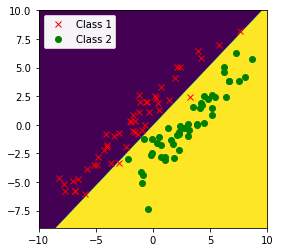

In [275]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
sample_mean = np.array([[2.5,0],[0,5]])
label_train = y_train
training = X_train
nclass =  max(np.unique(label_train))

# Set the feature range for ploting
max_x = np.ceil(max(training[:, 0])) + 1
min_x = np.floor(min(training[:, 0])) - 1
max_y = np.ceil(max(training[:, 1])) + 1
min_y = np.floor(min(training[:, 1])) - 1

xrange = (min_x, max_x)
yrange = (min_y, max_y)

# step size for how finely you want to visualize the decision boundary.
inc = 0.005

# generate grid coordinates. this will be the basis of the decision
# boundary visualization.
(x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

# size of the (x, y) image, which will also be the size of the
# decision boundary image that is used as the plot background.
image_size = x.shape
xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

# distance measure evaluations for each (x,y) pair.
pred_label = predict(w_opt, xy.T)-1

# reshape the idx (which contains the class label) into an image.
decisionmap = pred_label.reshape(image_size, order='F')

#show the image, give each coordinate a color according to its class label
plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

# plot the class training data.
plt.plot(training[label_train == 1, 0],training[label_train == 1, 1], 'rx')
plt.plot(training[label_train == 2, 0],training[label_train == 2, 1], 'go')
if nclass == 3:
    plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')

# include legend for training data
if nclass == 3:
    l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
else:
    l = plt.legend(('Class 1', 'Class 2'), loc=2)
plt.gca().add_artist(l)


plt.show()


In [266]:
xy

array([[-10.   ,  -9.   ],
       [-10.   ,  -8.995],
       [-10.   ,  -8.99 ],
       ...,
       [ 10.   ,   9.99 ],
       [ 10.   ,   9.995],
       [ 10.   ,  10.   ]])

In [270]:
pred_label2 = predict(w_opt, xy.T)-1
pred_label2

array([0, 0, 0, ..., 1, 1, 1])